# DT2470 Lab 04: Synchronization and rhythm

by Andre Holzapfel

In this lab you will choose to **either** do exercises regarding synchronization (chapter 3), **or** rhythm and tempo processing (chapter 6). We agree that doing both would be too much work (for this year), but you will have the code for the solutions for both anyway!

Again, you can use whatever software you want for your own implementation, but I use python in my explanations, and two external libraries in python need to be used in this Lab. Just as Bob, I am basically learning Python by working on this lab, so excuse my bad programming. (I am a bad programmer independent of language, anyway.)

Your task is to reproduce all shown figures with your code (or show the equivalent plots for your own audio files, if you use different ones). Also, provide short answers to the questions in the text.

## Audio samples:

In my examples I use file from the following google folder:

https://drive.google.com/drive/folders/1TGj4ZcEgdGXt9Eko2qViiiKWkUDDewbL?usp=sharing

You can copy these files to your own google folder and use them as explained in Lab 1.

At some points I will ask you to use some audio examples of your own. Be creative...the goal is to check where systems work or fail, and understand (to some extent) those behaviors.

## Code preparations

As for Lab 1, you need to have some external libraries also here:

In [10]:
# Install a python library for working with audio files, named pydub

!pip install pydub



In [11]:
#other preparations!
import os, sys
from scipy import signal
import pydub
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


### Google drive:

you need to adapt the following code to use the audio files that you copied to your google drive.

In [12]:
import gdown

url = 'https://drive.google.com/uc?id=11ESyqOo92IfsbHAZML9q2hAqvGShoLsh'
output = 'drumloop120_mono.wav'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11ESyqOo92IfsbHAZML9q2hAqvGShoLsh
To: /content/drumloop120_mono.wav
100%|██████████| 1.40M/1.40M [00:00<00:00, 155MB/s]


'drumloop120_mono.wav'

# 1. Synchronisation

Complete the tasks in this part, if you want to focus on the synchronisation (but have a look at the rhythm part below before you decide!).

## Part 1.1 Warming up

Choose two music sound files that can be considered as interpretations of the same "tune". In my example I used the cmajor_piano.wav and Cmajor_sung.wav, where a C-major scale is performed, once on piano and once sung. For the beginning, choose some excerpts, and not complete pieces, in order to get started.

Read the sound files to a numpy array, and plot the two waveforms. (You did that in Lab 1 too).

Below the waveform I get for the piano file: ![waveform](https://drive.google.com/uc?id=1nt5lUZ1IWO8nWDx2mTdddz2pI9CuBfTq)


## Part 1.2 Compute the spectral magnitude

For both signals compute a Short-time Fourier transform (STFT), and plot their magnitude spectra (as in equation 3.1. Use the code from Lab 1 as starting point). Note: Since you are focusing on tonal content in the Chroma features, use a long window (about 100ms).

The magnitude spectrum for the piano example is shown below.

Question: why do we see so few high-frequency components? (Hint: in lab 1 you plotted db magnitude spectra).

![](https://drive.google.com/uc?id=1_fEgRgIG0pPzCiNa6Pqz5lDfk-vfGloX)

## Part 1.3 Compute a log-frequency spectrogram

Now, transform the linear frequency axis into a logarithmic one (equation 3.4), and plot the resulting log-frequency spectra for both signals.

Hint: you need to assign the frequencies of the STFT coefficients to the desired pitch bins of the 12-tone resolution (equations 3.2 and 3.3, and the related text in the book help). Unless you are a good numpy programmer (I am not), you will need some loop in that code...

My piano log-f spectrogram looks as shown below.

Question: why do the low-frequency regions look so spread-out and smeary?

![](https://drive.google.com/uc?id=1pxHK7CVEX438DB4BAASGEiU3Qi-hw3Sc)



## Compute the chromagram

The chromagram is a feature that captures well harmonic and melodic development in a sound file. You will compute these features, to apply a synchronization (DTW) algorithm to them.



1.   Compute the chromagram according to equation 3.6

![](https://drive.google.com/uc?id=1Hj26wZ2WHufe1DkZqZoFrJ06kS7y8msS)

2.   Apply logarithmic compression to the chromagram. This will be your input feature for the DTW (my example uses gamma=100).

![](https://drive.google.com/uc?id=1eX8WhSmn6XxI8sIXxfRxdnssSrf2kICT)







## Part 1.4 Compute the synchronization

To this end, you will use the DTW as provided by the librosa library. You can see how to use it in the following code:

https://librosa.github.io/librosa_gallery/auto_examples/plot_music_sync

You can use your two computed chromagrams as inputs X and Y to this function, as they are. Compute the synchronization, and plot the path over the obtained cost matrix D. Your code should start somehow like:

In [13]:
import librosa
import librosa.display
D, wp = librosa.core.dtw(X=chromagram, Y=chromagram2, metric='cosine')

AttributeError: No librosa.core attribute dtw

The plot I obtain when synchronizing the piano and the voice example:

![](https://drive.google.com/uc?id=1RRtacUyBpbXQ8QMEgitRdSuLaH61MAGr)

## Part 1.5 Compute the same alignment using the chroma features from librosa

OK, we went by the course book when computing the features above. Now let us use the librosa library, to compare with our implementation.

To this end, you can copy/paste and edit the code from the librosa example provided above, and compute the plots!

The chroma features look less noisy for me, probably because I used the logarithmic compression with a bad parameter. Note that the book says that all the parameters need to be adapted with care (which some people might call feature engineering):

![](https://drive.google.com/uc?id=1lxDS13V7f_azktMmJP5e9NUvQrp2KQ0c)

After that the warping path looks as follows for me:

![](https://drive.google.com/uc?id=1K5F9XnD6iyDudo1R9V4oCgmCYTqTzju8)

Finally, also compute the alignment visualization between the waveforms, as done in the librosa example. Mine looks as follows:

![](https://drive.google.com/uc?id=1feMM7D7w4uK3UajklQm849X3mDPtdkRU)



## Part 1.6 Last task: conclude, explore



1.   Compare the alignment obtained from "your" features with those using the librosa features, are they different? If yes, why do you think?
2.   Replace the two simple sound files by two complete songs. You can use the Kafene1 and Kafene2 files in the shared folder, or some other song you like more. Compute the alignment, using the librosa features and provide a plot of the alignment curve. Did it work?
3. Find two files where the alignment does not work, and explain why. Note: this can be e.g. because the two versions differ in form (e.g. Refrain repeated in one version), tuning, or instrumentation. Also: the chroma features work best for harmonic instruments, and for western-tonal music.



# 2. Rhythm and tempo processing

In this part, we compute a spectral-based novelty function (often called spectral flux) to obtain onsets, we compute a Fourier tempogram to get tempo estimates, and we compare the beat tracker presented in the book with a recent state-of-the-art beat tracker that uses deep learning (out of the box using available code!).

Show your versions of my plots, and provide us with your code, and answer the questions in the text.

## Part 2.1 Onset detection using spectral-based novelty

In the examples below, I use the drumloop120_mono.wav to obtain the plots.

As a first step, compute a short-time Fourier transform (STFT) magnitude spectrogram, by applying a short window (I use 30ms, and 10ms hop size). Use the code from Lab 1 as starting point to read audio files and compute the STFT.

Then apply logarithmic compression (equation 6.5). Then the log-magnitude spectrum looks as follows for me (with gamma=100):

![](https://drive.google.com/uc?id=1F3Y3_iHy6tIZq2guIeQXIQIKPaONTzNO)

The next step is to compute the difference over time, and to do what is referred to as half-wave rectification in the book (equation 6.6). Plot the obtained matrix, which looks for me as follows:

![](https://drive.google.com/uc?id=17LaxEAAliDfaQ72V807iw4y9FkUdV_SK)

As you can see, the impulses of the drum onsets are emphasized in this representation.

Now you add this matrix along the columns to get a single vector, which looks as the blue line in the plot below.

![](https://drive.google.com/uc?id=1-iC2NFpeOx65vsbhiyk7-sWZ1NSljWde)

The yellow line shows the local average function (equation 6.7, mu(n)) that we will use for post processing. Hint: in order to obtain the local average function in python you can use the numpy function convolve(), if you google for "moving average" and "np.convolve" you will find examples.

When you subtract mu(n) from the spectral flux vector, and keep only positive values (equation 6.8), you obtain the final spectral novelty function. In addition, normalize the obtained vector so that the maximum is 1. It looks as follows for me (the blue line):

![](https://drive.google.com/uc?id=1rCRnhHkc_sR2d-wGIojRbmkOAAJrwmbb)

Finally, we want to obtain onsets! We do this by thresholding the obtained function, which means determining all points at which the function is larger than a certain number. The dotted red lines show the onsets that I get with a threshold of 0.5. (Hint: the stem function from the matplotlib does that plotting for you)

What is the value you need to set for the threshold to detect all onsets? Try it with another sound file, is the value the same?

Do you observe any other problems with the obtained onset detection?



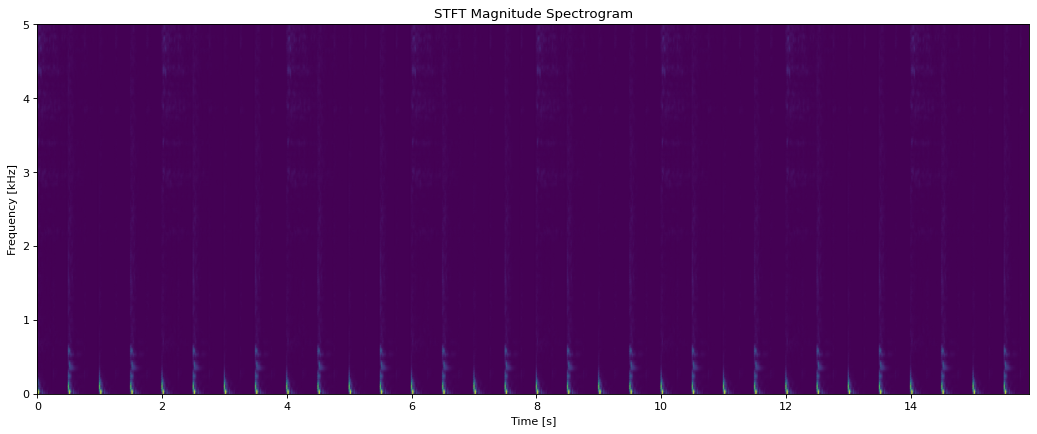

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment

audio = AudioSegment.from_wav(output)
audio_samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

window_size = int(0.03 * sample_rate)
hop_size = int(0.01 * sample_rate)
window = signal.get_window('hann', window_size)

frequencies, times, Zxx = signal.stft(audio_samples, fs=sample_rate, window=window, nperseg=window_size, noverlap=hop_size)
frequencies_kHz = frequencies / 1000

magnitude_spectrogram = np.abs(Zxx)

plt.figure(figsize=(16,6),dpi=80)
plt.pcolormesh(times, frequencies_kHz, magnitude_spectrogram, shading='gouraud')
plt.title('STFT Magnitude Spectrogram')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [s]')
plt.ylim((0, 5))
plt.show()

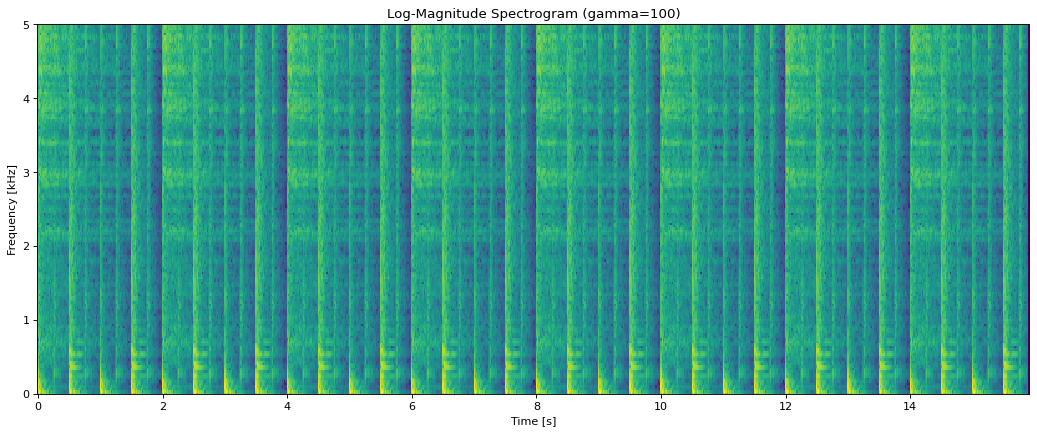

In [15]:
gamma = 100
log_magnitude_spectrogram = np.log1p(gamma * magnitude_spectrogram)
plt.figure(figsize=(16, 6), dpi=80)
plt.pcolormesh(times, frequencies_kHz, log_magnitude_spectrogram)
plt.title('Log-Magnitude Spectrogram (gamma=100)')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [s]')
plt.ylim((0,5))
plt.show()

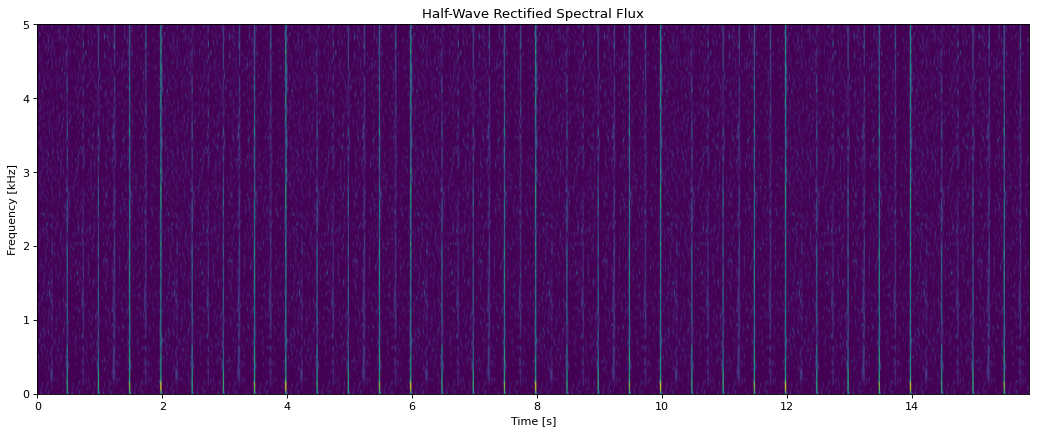

In [16]:
diff_log_magnitude_spectrogram = np.diff(log_magnitude_spectrogram, axis=1)
half_wave_rectified = np.maximum(diff_log_magnitude_spectrogram, 0)

plt.figure(figsize=(16, 6), dpi=80)
plt.pcolormesh(times[:-1], frequencies_kHz, half_wave_rectified, shading='gouraud')
plt.title('Half-Wave Rectified Spectral Flux')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [s]')
plt.ylim((0,5))
plt.show()

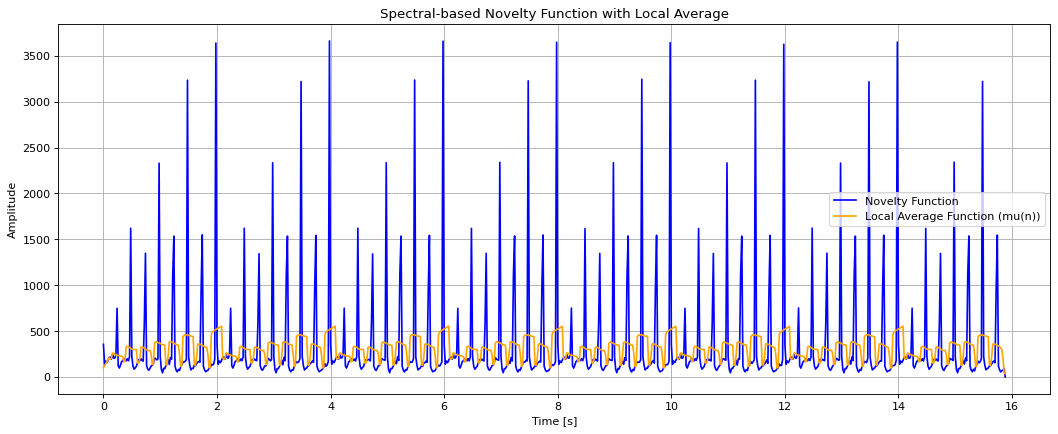

In [17]:
novelty_vector = np.sum(half_wave_rectified, axis=0)
window_length = 10
window = np.ones(window_length) / window_length
local_average = np.convolve(novelty_vector, window, mode='same')

plt.figure(figsize=(16, 6), dpi=80)

plt.plot(times[:-1], novelty_vector, color='blue', label='Novelty Function')

plt.plot(times[:-1], local_average, color='orange', label='Local Average Function (mu(n))')

plt.title('Spectral-based Novelty Function with Local Average')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

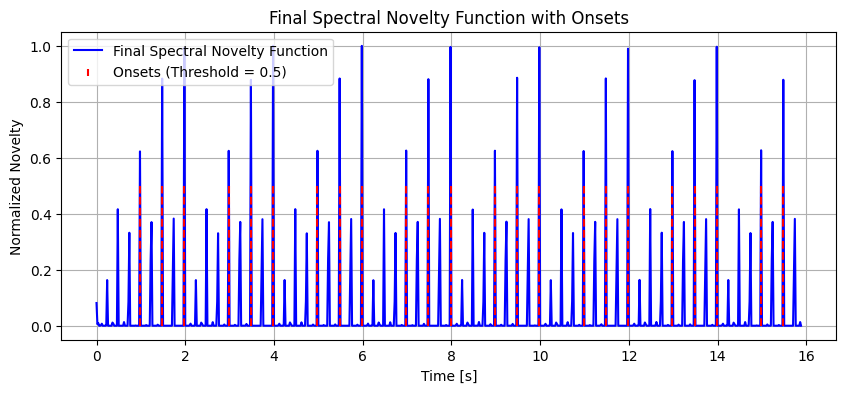

In [18]:
final_novelty_function = np.maximum(novelty_vector - local_average, 0)

final_novelty_function /= np.max(final_novelty_function)

plt.figure(figsize=(10, 4))
plt.plot(times[:-1], final_novelty_function, color='blue', label='Final Spectral Novelty Function')

threshold = 0.5
onsets = final_novelty_function > threshold

plt.stem(times[:-1], onsets * threshold, linefmt='r--', markerfmt=' ', basefmt=' ', label='Onsets (Threshold = 0.5)')

plt.title('Final Spectral Novelty Function with Onsets')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Novelty')
plt.grid(True)
plt.legend()
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1CuXfmufNjkiw83KgVOtdqu7xExXIqz9x
To: /content/cmajor_piano.wav
100%|██████████| 445k/445k [00:00<00:00, 70.5MB/s]


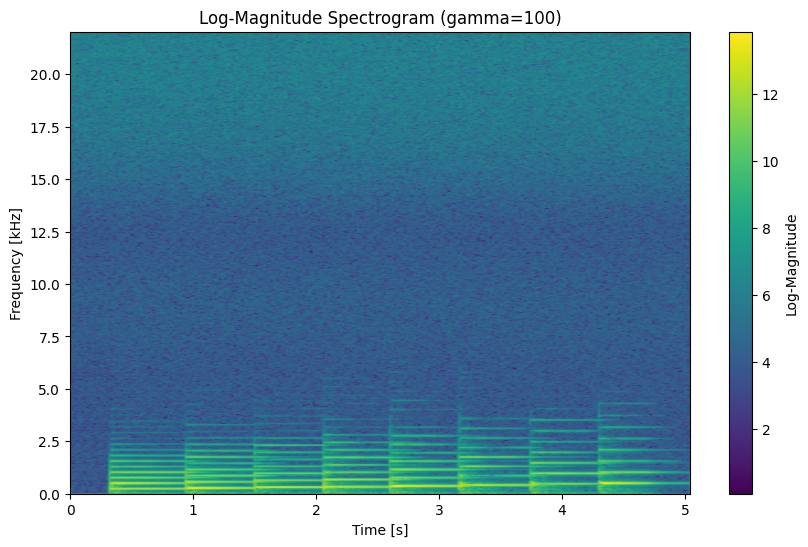

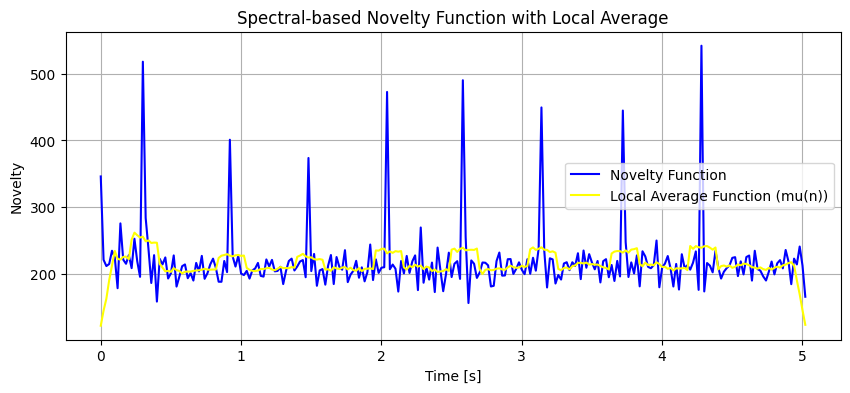

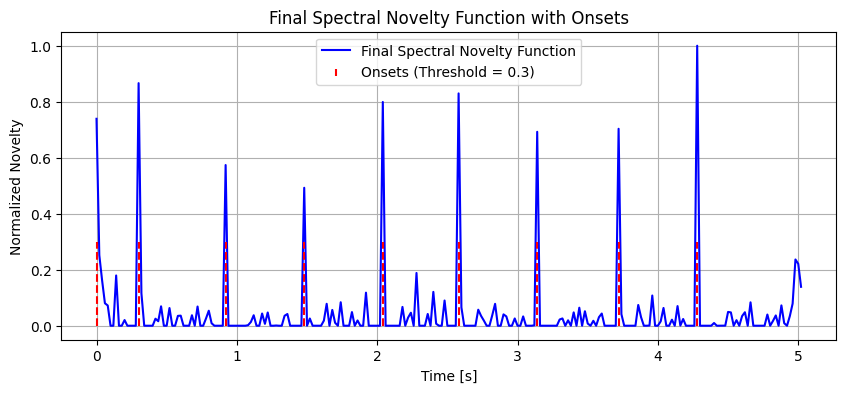

In [19]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment

url = 'https://drive.google.com/uc?id=1CuXfmufNjkiw83KgVOtdqu7xExXIqz9x'
output = 'cmajor_piano.wav'
gdown.download(url, output, quiet=False)

audio = AudioSegment.from_wav(output)
audio_samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

window_size = int(0.03 * sample_rate)
hop_size = int(0.01 * sample_rate)
window = signal.get_window('hann', window_size)

frequencies, times, Zxx = signal.stft(audio_samples, fs=sample_rate, window=window, nperseg=window_size, noverlap=hop_size)
magnitude_spectrogram = np.abs(Zxx)
gamma = 100
log_magnitude_spectrogram = np.log1p(gamma * magnitude_spectrogram)

frequencies_kHz = frequencies / 1000
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies_kHz, log_magnitude_spectrogram, shading='gouraud')
plt.title('Log-Magnitude Spectrogram (gamma=100)')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Log-Magnitude')
plt.show()

diff_log_magnitude_spectrogram = np.diff(log_magnitude_spectrogram, axis=1)
half_wave_rectified = np.maximum(diff_log_magnitude_spectrogram, 0)

novelty_vector = np.sum(half_wave_rectified, axis=0)

window_length = 10
window = np.ones(window_length) / window_length
local_average = np.convolve(novelty_vector, window, mode='same')

plt.figure(figsize=(10, 4))
plt.plot(times[:-1], novelty_vector, color='blue', label='Novelty Function')
plt.plot(times[:-1], local_average, color='yellow', label='Local Average Function (mu(n))')
plt.title('Spectral-based Novelty Function with Local Average')
plt.xlabel('Time [s]')
plt.ylabel('Novelty')
plt.grid(True)
plt.legend()
plt.show()

final_novelty_function = np.maximum(novelty_vector - local_average, 0)

final_novelty_function /= np.max(final_novelty_function)

plt.figure(figsize=(10, 4))
plt.plot(times[:-1], final_novelty_function, color='blue', label='Final Spectral Novelty Function')

threshold = 0.3
onsets = final_novelty_function > threshold

plt.stem(times[:-1], onsets * threshold, linefmt='r--', markerfmt=' ', basefmt=' ', label='Onsets (Threshold = 0.3)')

plt.title('Final Spectral Novelty Function with Onsets')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Novelty')
plt.grid(True)
plt.legend()
plt.show()

The threshold setting usually needs to be adjusted according to the specific characteristics of the audio file. Through multiple experiments, we can find an optimal threshold for different types of audio. At the same time, repeated detection and weak onsets processing are common problems in onset detection and need to be carefully adjusted.

## Part 2.2 Spectral-based novelty by madmom

Madmom is a python toolbox that does some state-of-the-art rhythm processing for you. The repository is here (along with some tutorials):

https://github.com/CPJKU/madmom

In order to get better novelty features, you can use the code in the following tutorial as starting point:

https://github.com/CPJKU/madmom_tutorials/blob/master/onset_detection.ipynb

You can **run this tutorial as an addition, if you want to understand more** about state-of-the-art signal processing.

In order to use madmom in colab, I have to install it as follows, and to restart the runtime...which means this is better done in a separate python notebook. In order to re-import all libraries and create all needed variables again this separate notebook should start as:



In [20]:
# Install python library madmom, for onset detection and beat tracking
!pip install git+https://github.com/CPJKU/madmom.git
!pip install numpy==1.24
!pip install pydub

  Cloning https://github.com/CPJKU/madmom.git to /tmp/pip-req-build-dy7h08ma
  Running command git clone --filter=blob:none --quiet https://github.com/CPJKU/madmom.git /tmp/pip-req-build-dy7h08ma
  Resolved https://github.com/CPJKU/madmom.git to commit 27f032e8947204902c675e5e341a3faf5dc86dae
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [21]:
import librosa
import librosa.display
import os, sys
from scipy import signal
import pydub
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import madmom
from scipy.ndimage.filters import maximum_filter
import IPython.display as ipd

#filename1 = 'cretansyrtos.wav'#put your file
#root_path = 'gdrive/My Drive/Teaching/DT2470/lab2/labdata/'#put your path

<ipython-input-21-08ca24ffc614>:10: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# #and start from here:
# music4beattracking = madmom.audio.signal.Signal(os.path.join(root_path,filename1), num_channels=1)

## Part 2.3 Compute a Fourier tempogram

We will use the above spectral-based novelty function as an input, to compute a tempogram. From this tempogram, we can get an estimate of the tempo of a piece.

Again, produce the figures that I show below. I use the drumloop again, but you can use more interesting music files as well, for instance I provided the "cretansyrtos.wav" as an example of some Cretan folk dance.

So, as a starting point, you need to compute the spectral novelty function (equation 6.8) for whatever sound you intend to use.

The Fourier tempogram then is nothing but the STFT magnitude of the novelty function, with the frequency values mapped to tempo values (equation 6.24). Below you see what I get for a window size of 8 seconds, and a hop size of 0.5 seconds:

![](https://drive.google.com/uc?id=1vgbnAiJ_vlGeO44j_syyIlTy_Z6FyiHm)

The red line in the above plot is the tempo estimate that I get, when I look for the maximum of the tempogram in each column in a range from 100 to 200 bpm. Implement this tempo estimation, and report also what you obtain when you do not constrain it to a specific tempo range.

Downloading...
From: https://drive.google.com/uc?id=180lKm34JR5kQ3PODGxGo9Utgbk7xf17o
To: /content/cretansyrtos.wav
100%|██████████| 27.5M/27.5M [00:00<00:00, 117MB/s]


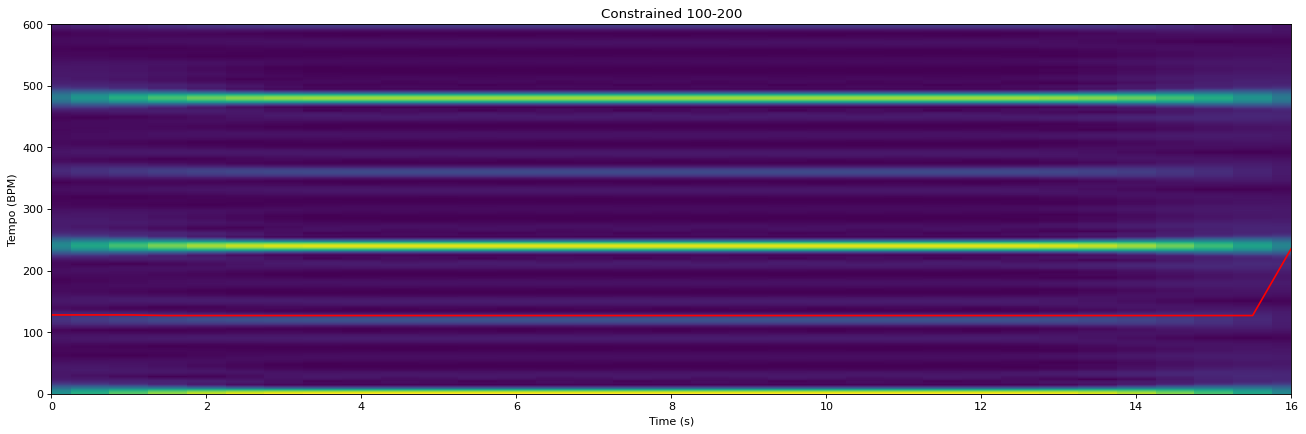

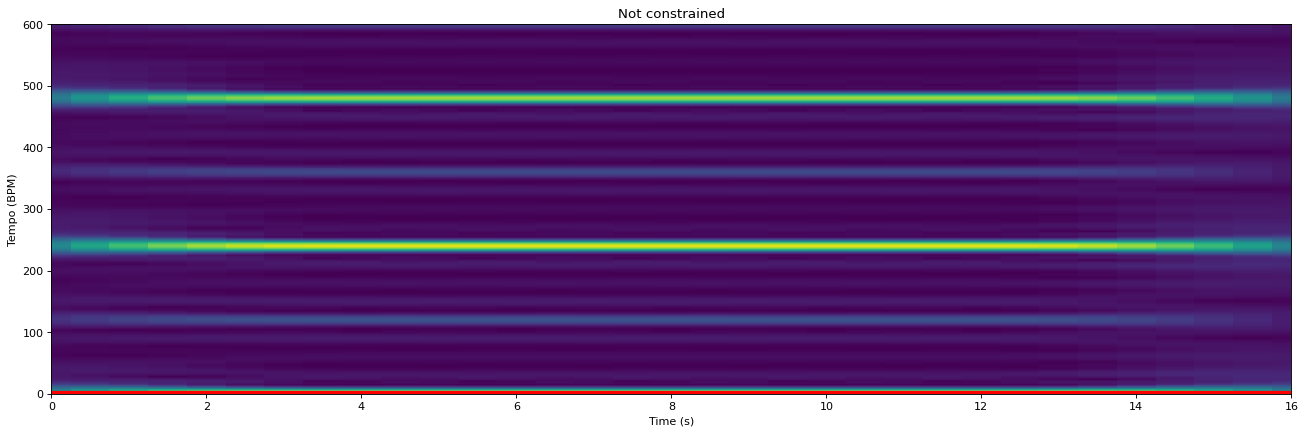

In [22]:
import numpy as np
from scipy import signal
import pydub
import matplotlib.pyplot as plt
import gdown

audio_url = 'https://drive.google.com/uc?id=180lKm34JR5kQ3PODGxGo9Utgbk7xf17o'
output_file = 'cretansyrtos.wav'
gdown.download(audio_url, output_file, quiet=False)


spec_window_size = 8
spec_hop_size = 0.5
audio_path = '/content/'
audio_filename = 'drumloop120_mono.wav'

audio_segment = pydub.AudioSegment.from_file(audio_path + audio_filename, format='wav')
audio_frame_rate = audio_segment.frame_rate

window_duration = 0.03
hop_duration = 0.01
frame_size = int(audio_frame_rate * window_duration)
hop_size = int(hop_duration * audio_frame_rate)
frame_rate_normalized = audio_frame_rate / hop_size
audio_sample_array = 2 * (np.array(audio_segment.get_array_of_samples()) / 2 ** 16)
if audio_segment.channels == 2:
    audio_sample_array = audio_sample_array[::2]
time_axis = np.linspace(0, len(audio_sample_array) / audio_frame_rate, num=len(audio_sample_array))
frequencies, times, stft_audio = signal.stft(audio_sample_array, fs=audio_frame_rate, window='hann', nperseg=frame_size, noverlap=(frame_size - hop_size), nfft=8192)
stft_magnitude = np.abs(stft_audio)
frequencies_khz = frequencies / 1000
log_compressed_spectrum = np.log(stft_magnitude * 100 + 1)
num_freq_bins, num_time_bins = log_compressed_spectrum.shape
time_difference_matrix = np.zeros_like(log_compressed_spectrum)
for freq_bin in range(num_freq_bins):
    time_diff = np.zeros(num_time_bins)
    time_diff[1:] = np.diff(log_compressed_spectrum[freq_bin])
    time_difference_matrix[freq_bin] = np.maximum(np.zeros(num_time_bins), time_diff)
sum_time_diff_matrix = np.sum(time_difference_matrix, axis=0)

window_size_local_avg = int(np.ceil(frame_rate_normalized * 0.2))
local_average = np.array([(1 / (2 * window_size_local_avg + 1)) * np.sum(sum_time_diff_matrix[max(m - window_size_local_avg, 0): min(m + window_size_local_avg + 1, num_time_bins)]) for m in range(num_time_bins)])
spectral_novelty_function = np.maximum(0, sum_time_diff_matrix - local_average)

normalized_spectral_novelty_function = spectral_novelty_function / np.max(spectral_novelty_function)
threshold_array = (normalized_spectral_novelty_function >= 0.7).astype(int)
spec_frame_size = int(frame_rate_normalized * spec_window_size)
spec_hop_size_calc = int(frame_rate_normalized * spec_hop_size)
freq_spectrogram, time_spectrogram, stft_spectrogram = signal.stft(normalized_spectral_novelty_function, fs=frame_rate_normalized, window='hann', nfft=8192, nperseg=spec_frame_size, noverlap=(spec_frame_size - spec_hop_size_calc))

stft_spectrogram_magnitude = np.abs(stft_spectrogram)
tempo_spectrogram = freq_spectrogram * 60
spec_100_200 = stft_spectrogram_magnitude[(tempo_spectrogram >= 100) & (tempo_spectrogram < 200)]
max_in_spec_range = np.argmax(spec_100_200, axis=0) + 100
max_spec = np.argmax(stft_spectrogram_magnitude, axis=0)
plt.figure(figsize=(20, 6), dpi=80)
plt.title('Constrained 100-200')
plt.pcolormesh(time_spectrogram, tempo_spectrogram, stft_spectrogram_magnitude)
plt.plot(time_spectrogram, max_in_spec_range, 'r')
plt.xlabel('Time (s)')
plt.xlim((0, 16))
plt.ylabel('Tempo (BPM)')
plt.ylim((0, 600))
plt.show()
plt.figure(figsize=(20, 6), dpi=80)
plt.title('Not constrained')
plt.pcolormesh(time_spectrogram, tempo_spectrogram, stft_spectrogram_magnitude)
plt.plot(time_spectrogram, max_spec, 'r', linewidth=6.5)
plt.xlabel('Time (s)')
plt.xlim((0, 16))
plt.ylabel('Tempo (BPM)')
plt.ylim((0, 600))
plt.show()

In the second graph, the red line stays near very low BPM (close to 0 BPM). This is because, when the BPM range is not constrained, the low-frequency part of the entire Tempogram dominates the tempo estimation, causing the tempo estimation value to be concentrated near the low-frequency component. The low-frequency component represents the slow speed changes or noise components in the audio.

## Part 2.4 Beat Tracking

In this part you will use two beat trackers, which are available in python:



1.   The librosa beat tracker, which is the dynamic programming approach presented in the book. An example for how to run the librosa beat tracker: https://musicinformationretrieval.com/beat_tracking.html

2.   And the madmom beat tracker, which is using deep learning.

Apply both beat trackers to audio examples having the following three characteristics:

1. stable tempo, strong onsets (for instance, the drum loop example)
2. instable tempo, strong onsets (for instance, the cretansyrtos)
3. weak energy onsets (for instance, a string quartet or a choir performance)

Provide plots for the waveform with the beats overlaid (using vlines or stem). Also listen to the beat tracking results, which you can do with code that looks somewhat as follows:



In [23]:
# import IPython.display as ipd
# clicks = librosa.clicks(beat_times, sr=sr, length=len(x))
# ipd.Audio(x + clicks, rate=sr)

For tracking with madmom, your code should look someshat as shown below. Note that in order to run madmom, I need to install it with the --force-install option, so it might be better to do that in a separate python notebook. A nice example that applies both librosa and madmom is here: https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/

In [24]:
# import madmom
# proc = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)
# act = madmom.features.beats.RNNBeatProcessor()(os.path.join(root_path,filename1))
# beat_times = proc(act)


Report what differences you observe (mainly by listening to the audio with the clicks for the beats) between the beat tracking outputs obtained from the two algorithms. Why do you think these differences emerge? (Given what you know from the book chapter and the from example on the analyticsvidhya website)

The plot of waveform and beats I get for the cretansyrtos example using librosa:

![](https://drive.google.com/uc?id=1l1YtJjrCHzaGUDEQ9O4UBafarf983CvW)

The plot of waveform and beats I get for the cretansyrtos example using madmom:

![](https://drive.google.com/uc?id=1L5LHO2EwgHgg8ypuj57gaj2j0eboCa5k)

Downloading...
From: https://drive.google.com/uc?id=11ESyqOo92IfsbHAZML9q2hAqvGShoLsh
To: /content/drumloop120_mono.wav
100%|██████████| 1.40M/1.40M [00:00<00:00, 26.5MB/s]


Librosa Estimated Tempo: [117.45383523] BPM


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


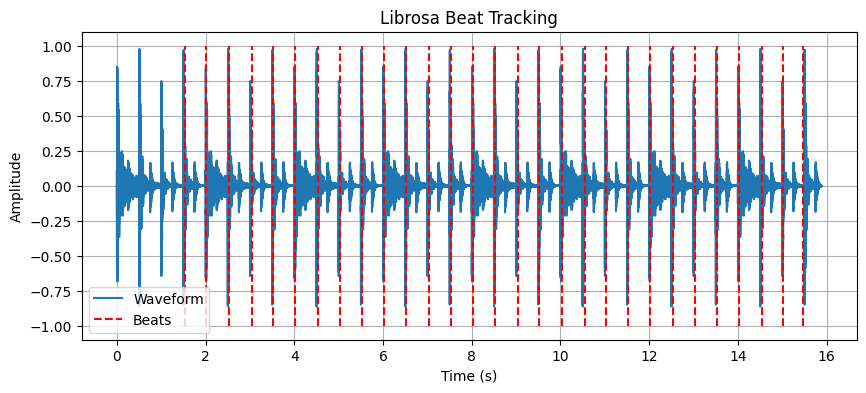

Madmom Estimated Beats: 32 Beats


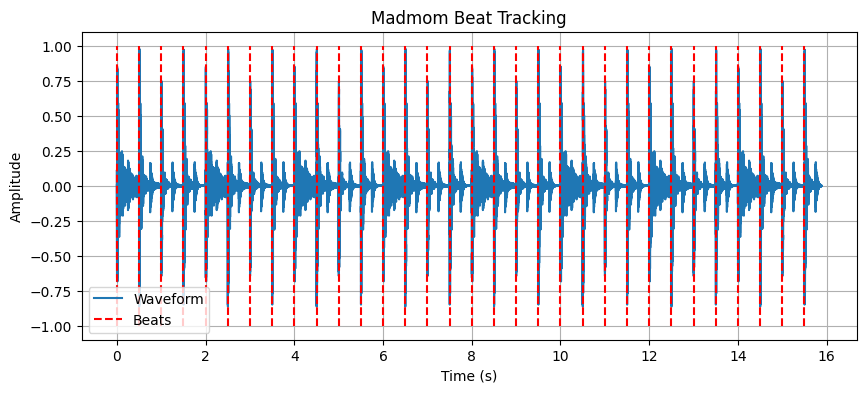

In [25]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import madmom
import gdown
import IPython.display as ipd

url = 'https://drive.google.com/uc?id=11ESyqOo92IfsbHAZML9q2hAqvGShoLsh'
output = 'drumloop120_mono.wav'
gdown.download(url, output, quiet=False)

audio_file = output
audio_data, sample_rate = librosa.load(audio_file)

audio_duration = len(audio_data) / sample_rate
time_axis = np.linspace(0, audio_duration, num=len(audio_data))

def librosa_beat_tracking(audio, sr):
    tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sr, start_bpm=120, units='time')
    return tempo, beat_frames

def madmom_beat_tracking(audio_path):
    processor = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)
    activation = madmom.features.beats.RNNBeatProcessor()(audio_path)
    beat_times = processor(activation)
    return beat_times

def plot_waveform_with_beats(time, audio, beats, title):
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio, label='Waveform')
    plt.vlines(beats, ymin=-1, ymax=1, color='r', linestyle='--', label='Beats')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

librosa_tempo, librosa_beats = librosa_beat_tracking(audio_data, sample_rate)
print(f"Librosa Estimated Tempo: {librosa_tempo} BPM")
plot_waveform_with_beats(time_axis, audio_data, librosa_beats, 'Librosa Beat Tracking')
madmom_beats = madmom_beat_tracking(audio_file)
print(f"Madmom Estimated Beats: {len(madmom_beats)} Beats")
plot_waveform_with_beats(time_axis, audio_data, madmom_beats, 'Madmom Beat Tracking')

librosa_clicks = librosa.clicks(times=librosa_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + librosa_clicks, rate=sample_rate)

madmom_clicks = librosa.clicks(times=madmom_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + madmom_clicks, rate=sample_rate)

The beat detection results of Librosa and Madmom are relatively consistent. Both are able to capture the rhythm of the drum loop well, but Madmom's detection results appear denser. This is because Madmom uses a deep learning-based model, which generally tends to prefer a higher level of detail when detecting beats, while Librosa relies more on the structure of the signal and dynamic programming.

Downloading...
From: https://drive.google.com/uc?id=180lKm34JR5kQ3PODGxGo9Utgbk7xf17o
To: /content/cretansyrtos.wav
100%|██████████| 27.5M/27.5M [00:00<00:00, 82.8MB/s]


Librosa Estimated Tempo: [132.51201923] BPM


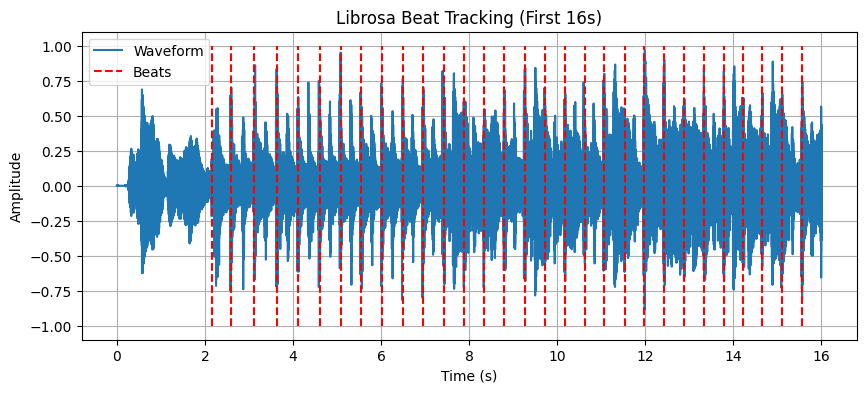

Madmom Estimated Beats: 34 Beats


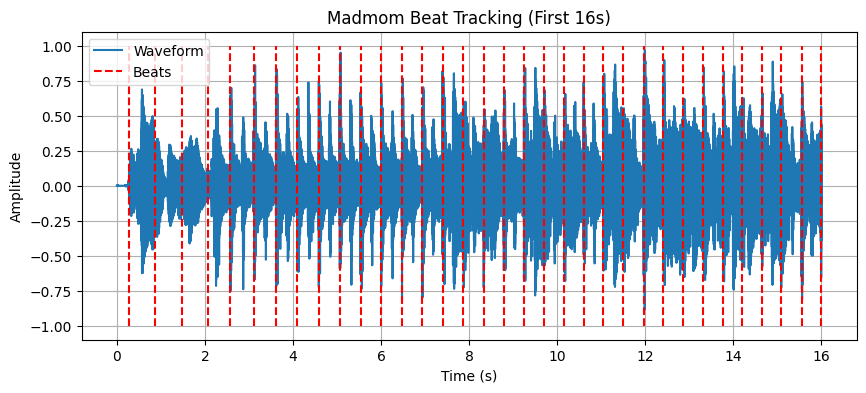

In [26]:
url = 'https://drive.google.com/uc?id=180lKm34JR5kQ3PODGxGo9Utgbk7xf17o'
output = 'cretansyrtos.wav'
gdown.download(url, output, quiet=False)

audio_file = output
audio_data, sample_rate = librosa.load(audio_file, sr=None, duration=16)

audio_duration = len(audio_data) / sample_rate
time_axis = np.linspace(0, audio_duration, num=len(audio_data))

def madmom_beat_tracking(audio_path, duration):
    processor = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)
    activation = madmom.features.beats.RNNBeatProcessor()(audio_path)
    beat_times = processor(activation)
    beat_times = beat_times[beat_times <= duration]
    return beat_times

librosa_tempo, librosa_beats = librosa_beat_tracking(audio_data, sample_rate)
print(f"Librosa Estimated Tempo: {librosa_tempo} BPM")
plot_waveform_with_beats(time_axis, audio_data, librosa_beats, 'Librosa Beat Tracking (First 16s)')

madmom_beats = madmom_beat_tracking(audio_file, 16)
print(f"Madmom Estimated Beats: {len(madmom_beats)} Beats")
plot_waveform_with_beats(time_axis, audio_data, madmom_beats, 'Madmom Beat Tracking (First 16s)')

librosa_clicks = librosa.clicks(times=librosa_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + librosa_clicks, rate=sample_rate)

madmom_clicks = librosa.clicks(times=madmom_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + madmom_clicks, rate=sample_rate)


Librosa’s beat detection is relatively sparse, missing some beats. Madmom detects more beats, which suggests that Madmom performs better when dealing with audio with less stable tempo. Librosa’s dynamic programming approach may not be able to accurately track all beats when dealing with large tempo variations.

Downloading...
From: https://drive.google.com/uc?id=1vCobGAxa5nQ39yKSJHK-vRVCKA0-TA5m
To: /content/Kafene2.wav
100%|██████████| 16.9M/16.9M [00:00<00:00, 142MB/s]


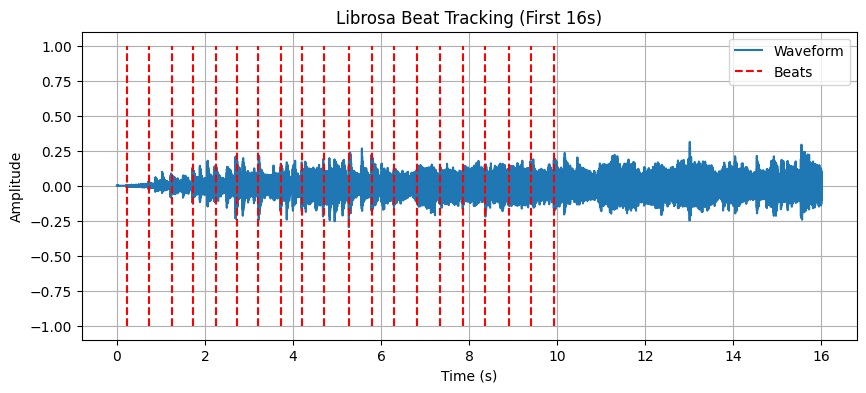

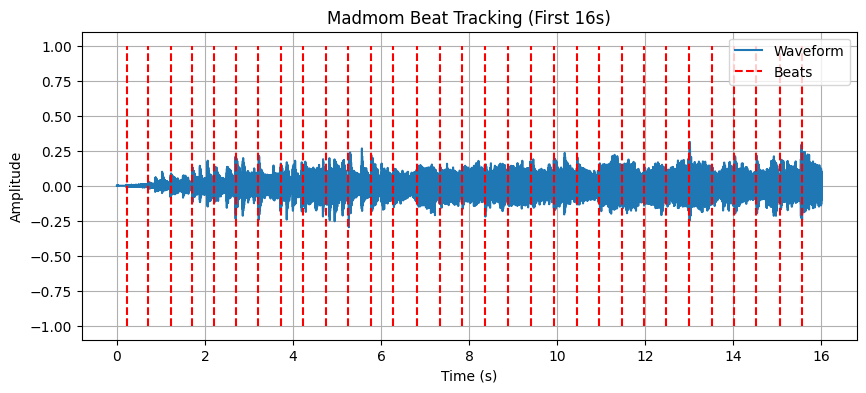

In [27]:
url = 'https://drive.google.com/uc?id=1vCobGAxa5nQ39yKSJHK-vRVCKA0-TA5m'
output = 'Kafene2.wav'
gdown.download(url, output, quiet=False)

audio_file = output
audio_data, sample_rate = librosa.load(audio_file, sr=None, duration=16)

audio_duration = len(audio_data) / sample_rate
time_axis = np.linspace(0, audio_duration, num=len(audio_data))

librosa_tempo, librosa_beats = librosa.beat.beat_track(y=audio_data, sr=sample_rate, start_bpm=120, units='time')

madmom_beats = madmom_beat_tracking(audio_file, 16)

plot_waveform_with_beats(time_axis, audio_data, librosa_beats, 'Librosa Beat Tracking (First 16s)')
plot_waveform_with_beats(time_axis, audio_data, madmom_beats, 'Madmom Beat Tracking (First 16s)')

librosa_clicks = librosa.clicks(times=librosa_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + librosa_clicks, rate=sample_rate)

madmom_clicks = librosa.clicks(times=madmom_beats, sr=sample_rate, length=len(audio_data))
ipd.Audio(audio_data + madmom_clicks, rate=sample_rate)


In weak energy audio, Librosa's beat detection is obviously not as good as the first two types of audio, and it cannot accurately identify weak beats. Madmom can still detect more beats, although the beat density has increased, but its overall performance is more stable than Librosa.